In [20]:
include("../code/exact_enum.jl")
include("../code/matrix_generator.jl")
include("../code/bp_full.jl")

fix_indep! (generic function with 1 method)

In [231]:
R = 0.2
n = 100
m = round(Int, n*(1-R))
f3 = 1-3R
Λ = [0,1-f3,f3]
K = [0, 0, 1]
nedges = 3m
H = permutedims(ldpc_matrix(n,m,nedges,Λ,K; accept_multi_edges=false))
s = bitrand(n)
B, indep = findbasis_slow(BitMatrix(H));

In [232]:
@time h0, h, mins = exact_wef(B, [src]);

  5.271016 seconds (16 allocations: 2.875 KiB)


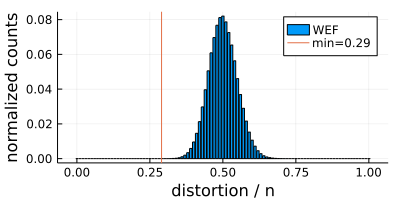

In [233]:
plot_wef(h[1], size=(400,200))

## Vary the rate

In [22]:
include("../code/exact_enum.jl")
include("../code/matrix_generator.jl")
include("../code/bp_full.jl")
include("../../telegram/notifications.jl")

default_tg_text (generic function with 1 method)

In [12]:
Rs = 0.04:0.04:0.34
ns = [25, 50, 75]
navg = [500, 200, 50]
d = [[fill(NaN, navg[i]) for _ in Rs] for i in eachindex(ns)]
d_ms = [[fill(NaN, navg[i]) for _ in Rs] for i in eachindex(ns)]
wef_src = [[[zeros(Int, ns[i]) for _ in 1:navg[i]] for _ in Rs] for i in eachindex(ns)]
wef_zero = [[[zeros(Int, ns[i]) for _ in 1:navg[i]] for _ in Rs] for i in eachindex(ns)]
t = fill(NaN, length(ns));

In [13]:
#@telegram "Exact enumeration copy" 
for (a,n) in enumerate(ns)
    println("### Size $a of ", length(ns))
    tt = @timed for (i,R) in enumerate(Rs)
        println("Rate $i of ", length(Rs))
        m = round(Int, n*(1-R))
        f3 = 1-3R
        Λ = [0,1-f3,f3]
        K = [0, 0, 1]
        nedges = 3m
        for j in 1:navg[a]       
            H = permutedims(ldpc_matrix(n,m,nedges,Λ,K; accept_multi_edges=false))
            s = bitrand(n)
            B, indep = findbasis_slow(BitMatrix(H))
            h0, h, mins = exact_wef(B, [s])
            wef_zero[a][i][j] = h0
            wef_src[a][i][j] = h[1]
            d[a][i][j] = mins[1]
            # maxsum
            efield = [(float(!ss), float(ss)) .+ 1e-5.*(randn(),randn()) for ss in s]
            ms = BPFull(H, efield)
            iteration_ms!(ms, maxiter=10^3, rein=1e-3)
            x = argmax.(ms.belief) .== 2
            p = parity(H, x)
            p != 0 && fix_indep!(x, B, indep)
            d_ms[a][i][j] = distortion(x, s) / n
        end
    end
    t[a] = tt.time
    d
end

### Size 1 of 3
Rate 1 of 8
Rate 2 of 8
Rate 3 of 8
Rate 4 of 8
Rate 5 of 8
Rate 6 of 8
Rate 7 of 8
Rate 8 of 8
### Size 2 of 3
Rate 1 of 8
Rate 2 of 8
Rate 3 of 8
Rate 4 of 8
Rate 5 of 8
Rate 6 of 8
Rate 7 of 8
Rate 8 of 8
### Size 3 of 3
Rate 1 of 8
Rate 2 of 8
Rate 3 of 8
Rate 4 of 8
Rate 5 of 8
Rate 6 of 8
Rate 7 of 8


Progress: 100%|█████████████████████████████████████████| Time: 0:00:07
Progress: 100%|█████████████████████████████████████████| Time: 0:00:06
Progress: 100%|█████████████████████████████████████████| Time: 0:00:06
Progress: 100%|█████████████████████████████████████████| Time: 0:00:06
Progress: 100%|█████████████████████████████████████████| Time: 0:00:06
Progress: 100%|█████████████████████████████████████████| Time: 0:00:06
Progress: 100%|█████████████████████████████████████████| Time: 0:00:06
Progress: 100%|█████████████████████████████████████████| Time: 0:00:06
Progress: 100%|█████████████████████████████████████████| Time: 0:00:06
Progress: 100%|█████████████████████████████████████████| Time: 0:00:06
Progress: 100%|█████████████████████████████████████████| Time: 0:00:06
Progress: 100%|█████████████████████████████████████████| Time: 0:00:06
Progress: 100%|█████████████████████████████████████████| Time: 0:00:06
Progress: 100%|█████████████████████████████████████████| Time: 

Rate 8 of 8


Progress: 100%|█████████████████████████████████████████| Time: 0:01:04
Progress: 100%|█████████████████████████████████████████| Time: 0:01:01
Progress: 100%|█████████████████████████████████████████| Time: 0:01:02
Progress: 100%|█████████████████████████████████████████| Time: 0:01:03
Progress: 100%|█████████████████████████████████████████| Time: 0:01:01
Progress: 100%|█████████████████████████████████████████| Time: 0:01:02
Progress: 100%|█████████████████████████████████████████| Time: 0:01:04
Progress: 100%|█████████████████████████████████████████| Time: 0:01:05
Progress: 100%|█████████████████████████████████████████| Time: 0:01:02
Progress: 100%|█████████████████████████████████████████| Time: 0:01:05
Progress: 100%|█████████████████████████████████████████| Time: 0:01:01
Progress: 100%|█████████████████████████████████████████| Time: 0:01:01
Progress: 100%|█████████████████████████████████████████| Time: 0:01:00
Progress: 100%|█████████████████████████████████████████| Time: 

In [14]:
d_avg = [mean.(d[i]) for i in eachindex(ns)]
d_std = [std.(d[i]) ./ sqrt(navg[i]) for i in eachindex(ns)];

Runtime: 65.0 minutes


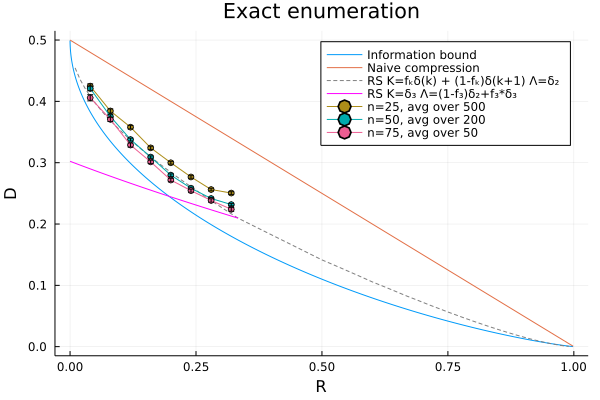

In [15]:
t_minutes = sum(t) / 60
println("Runtime: ", round(t_minutes,digits=1), " minutes")
pl = plot_rdb(f3=true)
for (i,n) in enumerate(ns)
    plot!(pl, Rs, d_avg[i], yerr=d_std[i], ms=3, label="n=$n, avg over $(navg[i])", marker=:o)
end
plot!(pl, title="Exact enumeration")

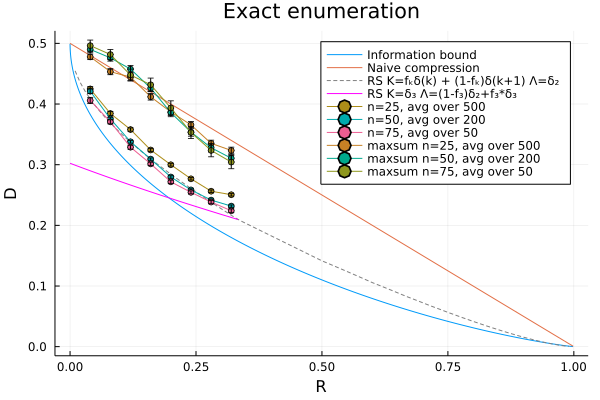

In [16]:
d_ms_avg = [mean.(d_ms[i]) for i in eachindex(ns)]
d_ms_std = [std.(d_ms[i]) ./ sqrt(navg[i]) for i in eachindex(ns)];
for (i,n) in enumerate(ns)
    plot!(pl, Rs, d_ms_avg[i], yerr=d_ms_std[i], ms=3, label="maxsum n=$n, avg over $(navg[i])", marker=:o)
end
pl

In [38]:
include("../code/exact_enum.jl")
include("../code/matrix_generator.jl")
include("../code/bp_full.jl")
include("../../telegram/notifications.jl")

default_tg_text (generic function with 1 method)

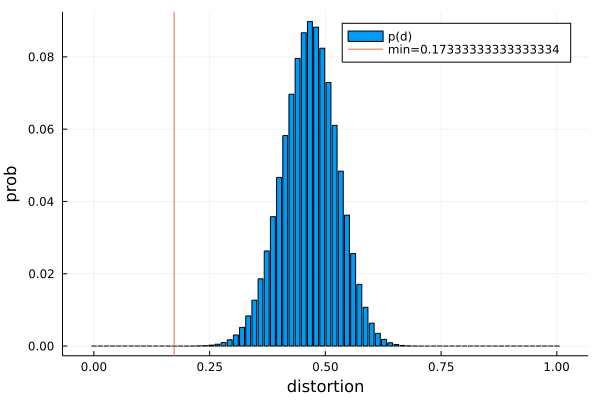

In [48]:
plot_wef_prob(wef_src[end][end][1], 1e1)